# Prophet Model from Facebook to be used in the time series analysis

In [45]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [46]:
df = pd.read_csv('./Data/DailyClimateData/DailyDelhiClimatetrain.csv',index_col = 'date',parse_dates=True)
print(df.head())
print("------------------------")
print(df.info())
print("------------------------")
print(df.describe())

             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05   6.000000  86.833333    3.700000   1016.500000
------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB
None
------------------------
          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   146

<Axes: xlabel='date', ylabel='meantemp'>

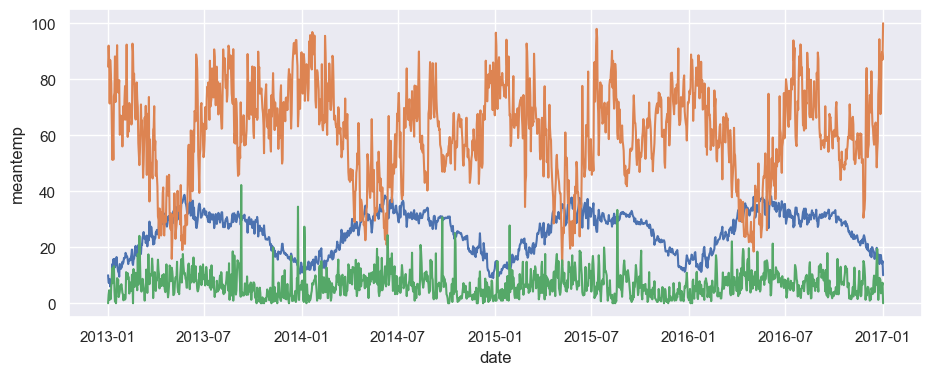

In [47]:
# Draw a line plot
sns.set(rc={'figure.figsize':(11,4)}, font_scale=1,style='darkgrid')
sns.lineplot(df,x='date',y='meantemp')
sns.lineplot(df,x='date',y='humidity')
sns.lineplot(df,x='date',y='wind_speed')
# sns.lineplot(df,x='date',y='meanpressure')

In [48]:
fig = px.line(df,x=df.index, y=['meantemp', 'humidity'],title='Mean Temperature and Humidity')
fig.show()

In [49]:
# scatter plot to check corelation between meantemp, humidity
fig1 = px.scatter(df,x='meantemp',y='humidity',title='Mean temperature vs Humidity',
                  trendline='ols',trendline_color_override="red")
fig1.show()

In [50]:
from scipy.stats import pearsonr

corr, _ = pearsonr(df["meantemp"],df['humidity'])
print("Pearson correlation: %.3f" %corr)

Pearson correlation: -0.572


<Axes: >

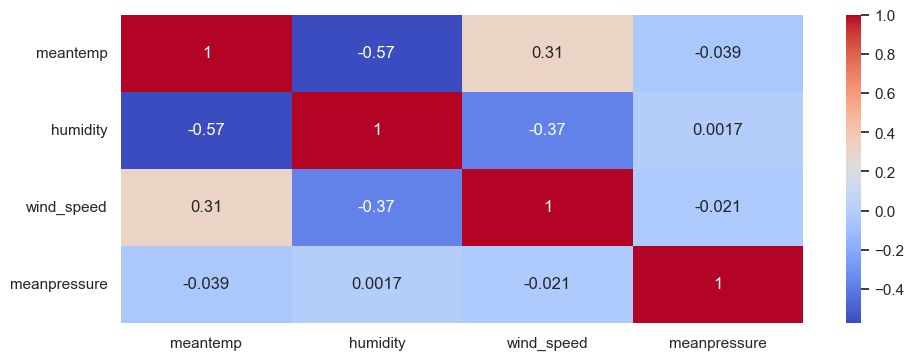

In [51]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

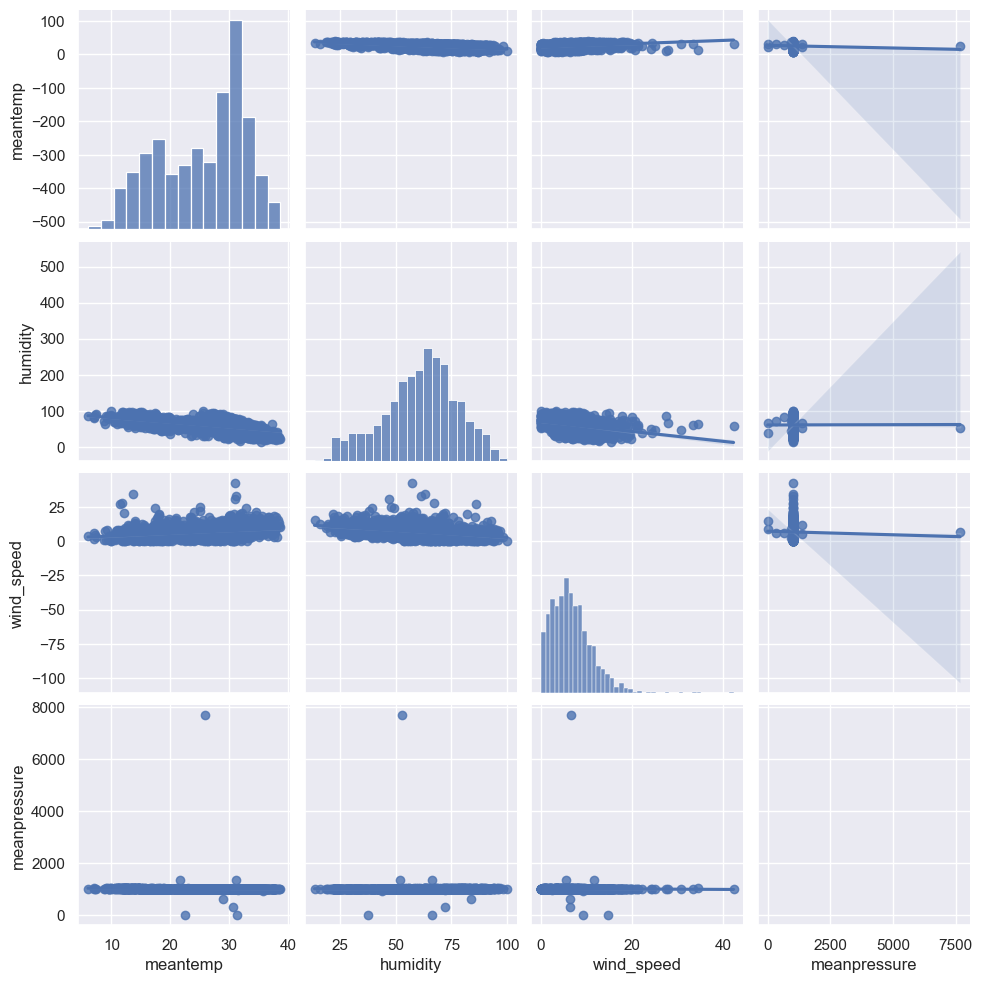

In [52]:
sns.pairplot(df,kind='reg')

In [53]:
# scale using minmaxscalar
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# scalar = MinMaxScaler()
scalar = StandardScaler()
df_scaled = pd.DataFrame(scalar.fit_transform(df),columns=df.columns,index=df.index)

df_scaled.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1.462000e+03,1.462000e+03,1.462000e+03,1.462000e+03
mean,-1.458022e-17,1.968330e-16,-1.944029e-16,-5.880689e-16
std,1.000342e+00,1.000342e+00,1.000342e+00,1.000342e+00
min,-2.654044e+00,-2.824109e+00,-1.491699e+00,-5.628829e+00
25%,-9.037230e-01,-6.201833e-01,-7.296443e-01,-5.286224e-02
50%,3.020541e-01,1.105528e-01,-1.273107e-01,-1.410365e-02
75%,7.909894e-01,6.828386e-01,5.342114e-01,2.131517e-02
max,1.799551e+00,2.340044e+00,7.766988e+00,3.701076e+01


<Axes: xlabel='date', ylabel='meantemp'>

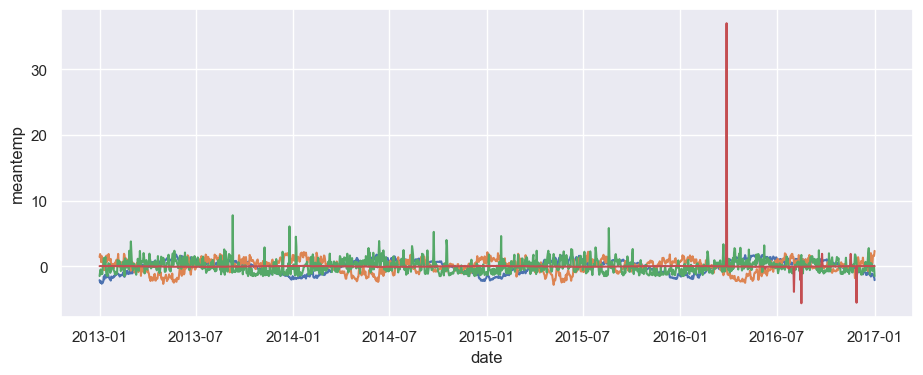

In [54]:
# Draw a line plot
sns.set(rc={'figure.figsize':(11,4)}, font_scale=1,style='darkgrid')
sns.lineplot(df_scaled,x='date',y='meantemp')
sns.lineplot(df_scaled,x='date',y='humidity')
sns.lineplot(df_scaled,x='date',y='wind_speed')
sns.lineplot(df_scaled,x='date',y='meanpressure')

In [55]:
fig = px.line(df_scaled,x=df.index, y="meanpressure")
fig.show()

In [56]:
# interpolate the outliers from mean pressure column on 28.March.2016
df.loc['2016-03-28','meanpressure'] = np.nan
df['meanpressure'] = df['meanpressure'].interpolate(method='time')
df.loc['2016-03-28']

meantemp          25.933333
humidity          52.800000
wind_speed         6.546667
meanpressure    1012.062500
Name: 2016-03-28 00:00:00, dtype: float64

In [57]:
# adding two columns in dataset for month and year
df_scaled['Month'] = df_scaled.index.month
df_scaled['Year'] = df_scaled.index.year
df_scaled.head()

,meantemp,humidity,wind_speed,meanpressure,Month,Year
date,,,,,,
2013-01-01,-2.109500,1.415439,-1.491699,0.025321,1,2013
2013-01-02,-2.463454,1.862828,-0.838196,0.037162,1,2013
2013-01-03,-2.495219,1.564569,-0.475626,0.041972,1,2013
2013-01-04,-2.291015,0.630022,-1.221233,0.033647,1,2013
2013-01-05,-2.654044,1.554627,-0.680303,0.029946,1,2013


In [58]:
df_scaled.Month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [59]:
# adding two columns in dataset for month and year
df['Month'] = df.index.month
df['Year'] = df.index.year
df.head()

,meantemp,humidity,wind_speed,meanpressure,Month,Year
date,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,2013
2013-01-02,7.400000,92.000000,2.980000,1017.800000,1,2013
2013-01-03,7.166667,87.000000,4.633333,1018.666667,1,2013
2013-01-04,8.666667,71.333333,1.233333,1017.166667,1,2013
2013-01-05,6.000000,86.833333,3.700000,1016.500000,1,2013


In [60]:
fig3 = px.line(df_scaled,x=df_scaled.index,y='meantemp',color='Year')
fig3.show()

In [61]:
fig4 = px.line(df,x=df.index,y='meantemp',color='Year')
fig4.show()

## Lets use the prophet model from python

In [62]:
df = pd.read_csv("./Data/DailyClimateData/DailyDelhiClimateTrain.csv")
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [63]:
df = df.rename(columns={'date':'ds','meantemp':'y'})
df.head()

,ds,y,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [69]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# call the model
model= Prophet()

model.fit(df)

forcast = model.make_future_dataframe(periods=365)
forcast = model.predict(forcast)
plot_plotly(model,forcast)

17:24:13 - cmdstanpy - INFO - Chain [1] start processing
17:24:13 - cmdstanpy - INFO - Chain [1] done processing
